In [193]:
import pandas as pd
import numpy as np
import nltk # NLP tool kit
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
# it is used to give count for each unique word
from sklearn.model_selection import train_test_split


In [194]:
messages = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\pandas python\spam1.csv' , encoding = 'cp1252')

In [195]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [196]:
messages.shape

(6776, 5)

In [197]:
messages.isnull().sum()

v1               0
v2               0
Unnamed: 2    6720
Unnamed: 3    6760
Unnamed: 4    6768
dtype: int64

In [200]:
messages = messages.iloc[:, [0,1]]
messages.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [201]:
messages.rename(columns = {'v1':'label', 'v2':'message'}, inplace = True)

In [204]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [205]:
messages.label.replace({'spam':1 , 'ham':0}, inplace = True)

In [206]:
messages.label.value_counts()

0    5854
1     922
Name: label, dtype: int64

In [207]:
# NLP STARTS NOW

In [208]:
messages.message= messages.message.str.lower()
messages.message
#whenever doing NLP either converted into lower case or upper case 
# bcz python is case sensitive

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
6771    this is the 2nd time we have tried 2 contact u...
6772                will ì_ b going to esplanade fr home?
6773    pity, * was in mood for that. so...any other s...
6774    the guy did some bitching but i acted like i'd...
6775                           rofl. its true to its name
Name: message, Length: 6776, dtype: object

In [17]:
from nltk.corpus import stopwords

In [131]:
from wordcloud import WordCloud

In [133]:
cloud=WordCloud(stopwords= stopwords.words('english'),max_words=600,width=800,height=400).generate(str(messages.message))


In [134]:
import matplotlib.pyplot as plt

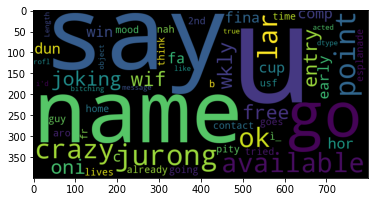

In [135]:
plt.imshow(cloud)

# bigger font size indicate more volume of words 

In [209]:
from textblob import TextBlob

In [216]:
sent_list=[]
for i in range(0,messages.shape[0]):
    blob=TextBlob(messages.iloc[i][1])
    polarity_score=blob.sentiment[0]
    sent_list.append(polarity_score)

In [217]:
len(sent_list)

6776

In [218]:
sent_list

[0.15000000000000002,
 0.5,
 0.30000000000000004,
 0.1,
 0.0,
 0.30833333333333335,
 0.0,
 0.0,
 0.0,
 0.475,
 0.0,
 1.0,
 0.5,
 0.6428571428571428,
 0.0,
 0.0,
 0.5,
 -0.125,
 0.4166666666666667,
 0.0,
 -0.3333333333333333,
 0.0,
 0.25,
 -0.15555555555555559,
 0.0,
 -0.12830687830687829,
 0.65,
 0.25,
 0.0,
 0.08750000000000002,
 0.021590909090909098,
 -0.6999999999999998,
 0.0,
 0.3333333333333333,
 0.2,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.65,
 0.45,
 0.4,
 0.0,
 1.0,
 0.0,
 0.0,
 0.35,
 0.0,
 -0.196875,
 0.25,
 -0.054166666666666655,
 0.1,
 0.1875,
 0.06818181818181818,
 0.0,
 0.5357142857142857,
 -0.25,
 0.0,
 0.0,
 0.0,
 0.7,
 0.0,
 0.0,
 0.275,
 0.16666666666666666,
 0.25,
 0.3,
 0.17045454545454544,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.35,
 0.03666666666666666,
 0.0,
 0.1,
 -0.25,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.3,
 0.0,
 -0.1,
 0.4,
 0.0,
 -0.18,
 0.24479166666666666,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.625,
 0.0,
 0.2333333333333333,
 0.0,
 0.0,
 0.048214285

In [219]:
messages['Sentiment_Score']=sent_list

In [220]:
messages.head()

,label,message,Sentiment_Score
0,0,"go until jurong point, crazy.. available only ...",0.15
1,0,ok lar... joking wif u oni...,0.50
2,1,free entry in 2 a wkly comp to win fa cup fina...,0.30
3,0,u dun say so early hor... u c already then say...,0.10
4,0,"nah i don't think he goes to usf, he lives aro...",0.00


In [221]:
messages["Sentiment_Score"].describe()

count    6776.000000
mean        0.128617
std         0.290114
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.309643
max         1.000000
Name: Sentiment_Score, dtype: float64

In [222]:
messages["Sentiment_Score"].mean()
# overall sentiment analysis is positive form the analysis as we can see
# so we get to knowthat most of mail have positive sendiment and by record also we have most of record of ham 

0.12861671822700088

In [223]:
# if we want to how many negavtive polarity records are there
messages[ messages["Sentiment_Score"]<0]

,label,message,Sentiment_Score
17,0,eh u remember how 2 spell his name... yes i di...,-0.125000
20,0,is that seriously how you spell his name?,-0.333333
23,0,aft i finish my lunch then i go str down lor. ...,-0.155556
25,0,just forced myself to eat a slice. i'm really ...,-0.128307
31,0,yeah he got in at 2 and was v apologetic. n ha...,-0.700000
...,...,...,...
6762,0,"sorry, i'll call later",-0.250000
6763,0,if you aren't here in the next &lt;#&gt; hou...,-0.100000
6765,0,get me out of this dump heap. my mom decided t...,-1.000000
6768,0,why don't you wait 'til at least wednesday to ...,-0.300000


In [228]:
len(messages[ messages["Sentiment_Score"]<0])
# so total no of - negavtive record are 960
# from this we get to know that most of the record almost all are positive 


960

In [229]:
blob.sentiment

Sentiment(polarity=0.575, subjectivity=0.775)

In [226]:
# Polarity leads to sentiment
# Subjectivity lead to Opinion
# if the fact then our subjectivity will be less
# polarity lies between the -1 to +1
# subjectivity lies between 0 to 1

# Vader Library (Its Pretrained Library )Sentiment analysis

In [230]:
import nltk

In [231]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [233]:
sent=SentimentIntensityAnalyzer()

In [234]:
compoud_list=[]
for i in range(0,messages.shape[0]):
    score=sent.polarity_scores(messages.iloc[i][1])
    sent_score=score['compound']
    compoud_list.append(sent_score)

In [235]:
messages["Score_Vader"]=compoud_list

In [236]:
messages.head()

,label,message,Sentiment_Score,Score_Vader
0,0,"go until jurong point, crazy.. available only ...",0.15,0.6249
1,0,ok lar... joking wif u oni...,0.50,0.4767
2,1,free entry in 2 a wkly comp to win fa cup fina...,0.30,0.7964
3,0,u dun say so early hor... u c already then say...,0.10,0.0000
4,0,"nah i don't think he goes to usf, he lives aro...",0.00,-0.1027


In [237]:
messages.Score_Vader.describe()

count    6776.000000
mean        0.196051
std         0.412681
min        -0.931900
25%         0.000000
50%         0.000000
75%         0.536875
max         0.997500
Name: Score_Vader, dtype: float64

In [242]:
messages["Score_Vader"].mean()
# overall sentiment analysis is positive form the analysis as we can see

0.1960511658795752

In [227]:
stopwords.words('english')
# this only shows me the stopwords in english 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
import string 

In [20]:
string.punctuation # latter we will remove them aswell

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
# we will remove the stopwords , punctuations 
# tokanization (assign id to each word)
# create a tdm 
# then do sampling , 
# build the model , 
# do the prediction

In [22]:
def text_process(mess): ## creating the function
    """                                ##a docstring
    1.remove the punctuation
    2.remove the stopwords
    3.return the list of clean textwords
    """
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]


In [23]:
 # messages['message'].apply(text_process) # only for explanation purpose 

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
# it is used to give count for each unique word

In [25]:
after_trans = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [26]:
after_trans.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [27]:
len(after_trans.vocabulary_)
# when we create the TDM it should have 9422 cols 
# & 6776 rows 

9422

In [28]:
TdmSpamData = after_trans.transform(messages['message'])

In [29]:
TdmSpamData.shape
# TDM will act as as X variables 
# messages.label will act as y variable

(6776, 9422)

In [30]:
type(TdmSpamData)

scipy.sparse.csr.csr_matrix

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_x , test_x , train_y ,test_y = train_test_split(TdmSpamData , messages.label ,test_size = .2)

In [33]:
# after sampling we can use any of our classification model

# Naive_Bayes Model

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb_spam = MultinomialNB()

In [35]:
nb_spam.fit(train_x , train_y)

MultinomialNB()

In [36]:
pred_nb = nb_spam.predict(test_x)

In [37]:
from sklearn.metrics import confusion_matrix
tab_spam_nb = confusion_matrix(test_y , pred_nb) 
tab_spam_nb

array([[1169,   16],
       [  14,  157]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,pred_nb)

0.9778761061946902

In [80]:
from sklearn.metrics import precision_score

In [81]:
precision_score(test_y , pred_nb)

0.9075144508670521

In [82]:
from sklearn.metrics import recall_score

In [83]:
recall_score(test_y , pred_nb)

0.9181286549707602

In [84]:
# f1 score = 2*P*R/(P+R)

In [85]:
from sklearn.metrics import f1_score

In [86]:
f1_score(test_y , pred_nb)

0.9127906976744187

# Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

dt.fit(train_x , train_y)

pred1 = dt.predict(test_x)

In [122]:
tab_1 = confusion_matrix(test_y , pred1) 
tab_1

array([[1175,   10],
       [  27,  144]], dtype=int64)

In [123]:
accuracy_score(test_y,pred1)

0.9727138643067846

In [124]:
from sklearn.metrics import precision_score

In [125]:
precision_score(test_y,pred1)

0.935064935064935

In [126]:
from sklearn.metrics import recall_score

In [127]:
recall_score(test_y,pred1)

0.8421052631578947

In [128]:
# f1 score = 2*P*R/(P+R)

In [129]:
from sklearn.metrics import f1_score

In [130]:
f1_score(test_y,pred1)

0.8861538461538462

# Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_x , train_y )
pred2 = rfc.predict(test_x)

In [102]:
tab_2 = confusion_matrix(test_y , pred2) 
tab_2

array([[1185,    0],
       [  26,  145]], dtype=int64)

In [103]:
accuracy_score(test_y,pred2)

0.9808259587020649

In [104]:
from sklearn.metrics import precision_score

In [105]:
precision_score(test_y,pred2)

1.0

In [106]:
from sklearn.metrics import recall_score

In [107]:
recall_score(test_y,pred2)

0.847953216374269

In [108]:
# f1 score = 2*P*R/(P+R)

In [109]:
from sklearn.metrics import f1_score

In [110]:
f1_score(test_y,pred2)

0.9177215189873417

# Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(train_x , train_y)
pred3 = logreg.predict(test_x)

In [112]:
tab_3= confusion_matrix(test_y , pred3) 
tab_3

array([[1181,    4],
       [  23,  148]], dtype=int64)

In [113]:
accuracy_score(test_y,pred3)

0.9800884955752213

In [114]:
from sklearn.metrics import precision_score

In [115]:
precision_score(test_y,pred3)

0.9736842105263158

In [116]:
from sklearn.metrics import recall_score

In [117]:
recall_score(test_y,pred3)

0.8654970760233918

In [118]:
# f1 score = 2*P*R/(P+R)

In [119]:
from sklearn.metrics import f1_score

In [120]:
f1_score(test_y,pred3)

0.9164086687306502

# Trip_Advisor Datasets

In [49]:
tad = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\pandas python\Trip_advisor_review.csv' ,  encoding="utf8")

In [50]:
tad.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [51]:
tad.shape

(20491, 2)

In [52]:
tad.isnull().sum()

Review    0
Rating    0
dtype: int64

In [53]:
tad.Review = tad.Review .str.lower()
tad.Review 

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

# Text blob

In [243]:
blob1=TextBlob(tad.iloc[0][0])

In [244]:
blob1.sentiment

Sentiment(polarity=0.20874404761904758, subjectivity=0.687)

In [245]:
blob1.sentiment[0]

0.20874404761904758

In [246]:
sent_list=[]
for i in range(0,tad.shape[0]):
    blob1=TextBlob(tad.iloc[i][0])
    polarity_score=blob1.sentiment[0]
    sent_list.append(polarity_score)

In [247]:
len(sent_list)

20491

In [248]:
sent_list

[0.20874404761904758,
 0.21492277992277992,
 0.29441964285714284,
 0.5048245614035087,
 0.38461538461538464,
 0.2430555555555556,
 0.36666065416065424,
 0.5629629629629629,
 0.3129464285714286,
 0.2863553113553114,
 0.24166666666666664,
 0.23451178451178448,
 0.2384178321678322,
 -0.09166666666666666,
 0.3050925925925926,
 0.006510416666666666,
 0.16041092745638202,
 0.3420987654320988,
 0.5,
 0.10115942028985507,
 0.17738095238095236,
 0.596875,
 0.38083333333333336,
 0.28802083333333334,
 0.259375,
 0.2518518518518519,
 0.46851851851851856,
 0.06562499999999999,
 0.3052838827838828,
 0.45698593073593075,
 0.3439102564102564,
 0.1893772893772894,
 0.11683673469387755,
 0.12638888888888888,
 0.2541666666666667,
 0.32475490196078427,
 0.30333333333333334,
 0.3077272727272727,
 0.12142857142857144,
 0.49375,
 -0.027838827838827834,
 0.33915343915343915,
 -0.22999999999999998,
 0.1741758241758242,
 -0.04305555555555555,
 0.1283900091136933,
 0.11168831168831167,
 0.19564102564102565,
 0.5

In [249]:
tad['Sentiment_Score']=sent_list

In [250]:
tad.head()

,Review,Rating,Sentiment_Score
0,nice hotel expensive parking got good deal sta...,3,0.208744
1,ok nothing special charge diamond member hilto...,1,0.214923
2,nice rooms not 4* experience hotel monaco seat...,2,0.294420
3,"unique, great stay, wonderful time hotel monac...",3,0.504825
4,"great stay great stay, went seahawk game aweso...",3,0.384615


In [251]:
tad["Sentiment_Score"].describe()

count    20491.000000
mean         0.274278
std          0.181452
min         -1.000000
25%          0.177426
50%          0.280371
75%          0.384903
max          1.000000
Name: Sentiment_Score, dtype: float64

In [26]:
tad["Sentiment_Score"].mean()
# overall sentiment analysis is positive form the analysis as we can see

0.27427779068137187

In [252]:
# if we want to how many negavtive polarity records are there
tad[ tad["Sentiment_Score"]<0]

,Review,Rating,Sentiment_Score
13,nice hotel not nice staff hotel lovely staff q...,2,-0.091667
40,"bad choice, booked hotel hot wire called immed...",1,-0.027839
42,warwick bad good reviews warwick shocks staff ...,1,-0.230000
44,"austin powers decor familiar, hotel seattlewhe...",1,-0.043056
65,"hated inn terrible, room-service horrible staf...",1,-0.633333
...,...,...,...
20352,mice room husband stayed museum hotel month st...,1,-0.177273
20360,"disgusting stayed 1 night glad, room looked cu...",1,-0.035374
20403,not check-out fast drove unappealing alley hot...,1,-0.002083
20421,worst sleep hip tooooo hip nite club building ...,1,-0.242857


In [253]:
len(tad[ tad["Sentiment_Score"]<0])
# so total no of - negavtive record are 1356
# from this we get to know that most of the record almost all are positive 


1356

# Vader Library (Its Pretrained Library )Sentiment analysis

In [254]:
import nltk

In [255]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [256]:
#nltk.download('vader_lexicon')# lexicon = Dictionary

In [258]:
sent1=SentimentIntensityAnalyzer()

In [259]:
compoud_list=[]
for i in range(0,tad.shape[0]):
    score=sent1.polarity_scores(tad.iloc[i][0])
    sent_score=score['compound']
    compoud_list.append(sent_score)

In [260]:
sent_score

-0.6071

In [261]:
tad["Score_Vader"]=compoud_list

In [262]:
tad.head()

,Review,Rating,Sentiment_Score,Score_Vader
0,nice hotel expensive parking got good deal sta...,3,0.208744,0.9747
1,ok nothing special charge diamond member hilto...,1,0.214923,0.9787
2,nice rooms not 4* experience hotel monaco seat...,2,0.294420,0.9889
3,"unique, great stay, wonderful time hotel monac...",3,0.504825,0.9912
4,"great stay great stay, went seahawk game aweso...",3,0.384615,0.9797


In [263]:
tad.Score_Vader.describe()

count    20491.000000
mean         0.803430
std          0.455671
min         -0.997400
25%          0.918400
50%          0.973800
75%          0.988800
max          0.999900
Name: Score_Vader, dtype: float64

In [54]:
after_trans_tad = CountVectorizer(analyzer=text_process).fit(tad['Review'])

In [136]:
from wordcloud import WordCloud

In [137]:
#pip install wordcloud

In [138]:
cloud=WordCloud(stopwords= stopwords.words('english'),max_words=600,width=800,height=400).generate(str(tad.Review))
# check the documentation and to the pratice

In [139]:
import matplotlib.pyplot as plt

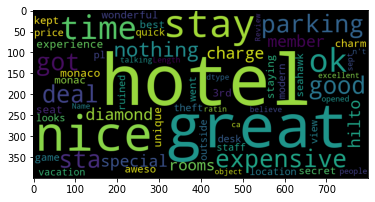

In [140]:
plt.imshow(cloud)

# bigger font size indicate more volume of words 

In [ ]:
after_trans_tad = CountVectorizer(analyzer=text_process).fit(tad['Review'])

In [55]:
after_trans_tad.vocabulary_

{'nice': 49206,
 'hotel': 36909,
 'expensive': 28378,
 'parking': 53208,
 'got': 33582,
 'good': 33347,
 'deal': 21915,
 'stay': 68556,
 'anniversary': 6999,
 'arrived': 8200,
 'late': 42141,
 'evening': 27588,
 'took': 73466,
 'advice': 5264,
 'previous': 56545,
 'reviews': 61027,
 'valet': 76980,
 'check': 16606,
 'quick': 57945,
 'easy': 25627,
 'little': 43220,
 'disappointed': 23592,
 'nonexistent': 49873,
 'view': 77537,
 'room': 61740,
 'clean': 17592,
 'size': 65815,
 'bed': 11090,
 'comfortable': 18553,
 'woke': 80136,
 'stiff': 68860,
 'neck': 48790,
 'high': 36036,
 'pillows': 54643,
 'soundproof': 67119,
 'like': 42920,
 'heard': 35439,
 'music': 48313,
 'night': 49383,
 'morning': 47723,
 'loud': 43892,
 'bangs': 9939,
 'doors': 24555,
 'opening': 51490,
 'closing': 17921,
 'hear': 35436,
 'people': 53896,
 'talking': 70917,
 'hallway': 34815,
 'maybe': 45647,
 'noisy': 49763,
 'neighbors': 48969,
 'aveda': 9092,
 'bath': 10462,
 'products': 57041,
 'goldfish': 33298,
 'to

In [56]:
len(after_trans_tad.vocabulary_)

81408

In [57]:
Tdm_tad_Data = after_trans_tad.transform(tad['Review'])

In [58]:
Tdm_tad_Data.shape

(20491, 81408)

In [59]:
type(Tdm_tad_Data)

scipy.sparse.csr.csr_matrix

In [60]:
from sklearn.model_selection import train_test_split

tad_train_x , tad_test_x , tad_train_y ,tad_test_y = train_test_split(Tdm_tad_Data , tad.Rating ,test_size = .2)

In [61]:
tad_train_x.shape

(16392, 81408)

In [62]:
tad_train_y.shape

(16392,)

# Naive_Bayes Model

In [63]:
from sklearn.naive_bayes import MultinomialNB
nb_tad = MultinomialNB()

In [64]:
nb_tad.fit(tad_train_x , tad_train_y)

MultinomialNB()

In [65]:
pred = nb_tad.predict(tad_test_x)

In [66]:
tab_tad_nb = confusion_matrix(tad_test_y , pred) 
tab_tad_nb


array([[  80,   94,    7,   86,   24],
       [  17,   73,   11,  208,   50],
       [   2,   17,   11,  335,   93],
       [   2,    5,    2,  572,  632],
       [   1,    0,    1,  262, 1514]], dtype=int64)

In [67]:
acc = tab_tad_nb.diagonal().sum() * 100 /tab_tad_nb.sum()
acc

54.89143693583801

In [68]:
tad.Rating.replace({ 1:1 , 2:1 , 3:2 , 4:3 ,5:3}, inplace = True)

In [69]:
tad.Rating.value_counts()

3    15093
1     3214
2     2184
Name: Rating, dtype: int64

# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(tad_train_x , tad_train_y)
pred1 = logreg.predict(tad_test_x)



C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
tab_1= confusion_matrix(tad_test_y , pred1) 
tab_1

array([[ 175,   74,   20,   13,    9],
       [  70,  132,   87,   49,   21],
       [  15,   73,  163,  169,   38],
       [   5,   28,  121,  582,  477],
       [   5,   11,   28,  400, 1334]], dtype=int64)

In [72]:
acc1 = tab_1.diagonal().sum() * 100 /tab_1.sum()
acc1

58.20931934618199

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(tad_train_x , tad_train_y )
pred2 = rfc.predict(tad_test_x)

In [74]:
tab_2= confusion_matrix(tad_test_y , pred2) 
tab_2

array([[  84,   10,    1,   58,  138],
       [  18,    7,    1,  137,  196],
       [   6,    1,    1,  213,  237],
       [   0,    1,    0,  326,  886],
       [   0,    0,    0,  125, 1653]], dtype=int64)

In [75]:
acc2 = tab_2.diagonal().sum() * 100 /tab_2.sum()
acc2

50.52451817516467

# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

dt.fit(tad_train_x , tad_train_y)

pred3 = dt.predict(tad_test_x)

In [77]:
tab_3 = confusion_matrix(tad_test_y , pred3) 
tab_3

array([[ 115,   60,   33,   31,   52],
       [  52,   81,   58,   85,   83],
       [  30,   69,   80,  162,  117],
       [  28,   70,  114,  438,  563],
       [  39,   40,   89,  464, 1146]], dtype=int64)

In [78]:
acc3 = tab_3.diagonal().sum() * 100 /tab_3.sum()
acc3

45.376921200292756